Epoch 1/50
235/235 [==============================] - 4s 10ms/step - loss: 0.2814 - val_loss: 0.1893
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1698 - val_loss: 0.1515
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1427 - val_loss: 0.1322
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1271 - val_loss: 0.1198
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1170 - val_loss: 0.1116
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1101 - val_loss: 0.1062
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1052 - val_loss: 0.1019
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1016 - val_loss: 0.0988
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0989 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0972 - val_los

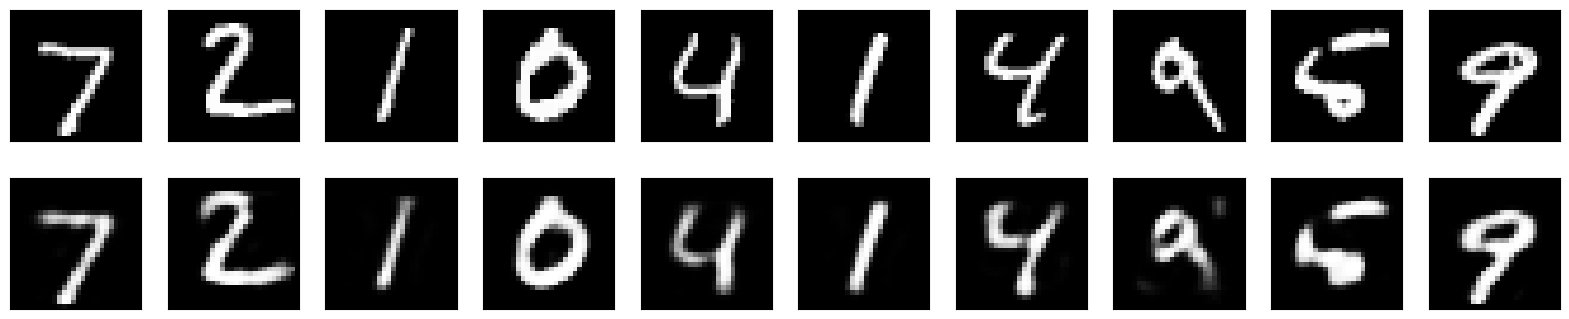

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the architecture of the autoencoder
input_size = 784  # 28x28 images
encoding_dim = 32  # Compression factor

input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_size, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = autoencoder.predict(x_test)

# Plot the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
